In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore") 

# Step - 1 : Data Collection

In [3]:
data = pd.read_csv("abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## What are the columns?

In [4]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

## Data information:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Checking with the null values in the data:

In [6]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### Observation: No null values Present in any of the column in the dataset

# Step - 2: Data Analysis

## Statistical information of the data:

In [8]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Observation: 
###                1) Here we can see that the "count" is equal to the number of rows in each of the column

###               2) Also we can see that difference between the "mean" and "standard deviation" is also good which                   doesnot impose any effect on our model. 
               
###               3) None of the features have minimum = 0

###               4) Here we can also see that the rings are highly concentrated in 2nd and 3rd quartiles and so the
###                     standard   deviation is <1 and there is possibilty of the normal distributed curve here.

# Step - 3: Visualization:

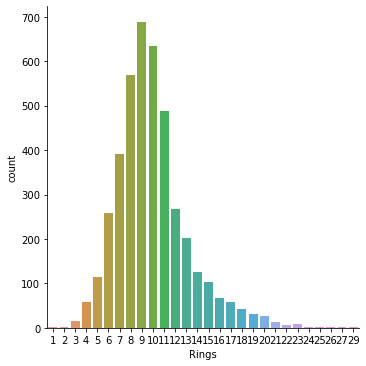

In [7]:
sns.catplot(x = 'Rings', data = data, kind = 'count' )

## Observation: 
###    1) Here with the help of this catplot we can say that the attribute "ring" ranges from the values 2 to 29.
###    2) Also here the maximum count of the rings is at "9 and 10".

# Univariate Analysis:

## Target Attribute:

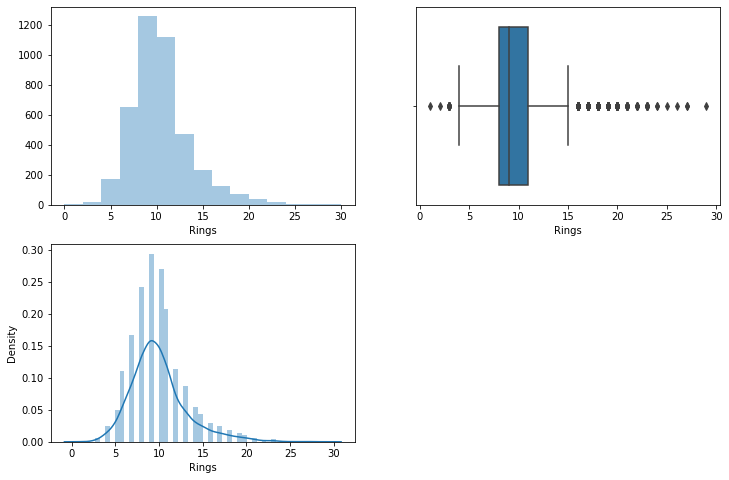

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(data['Rings']);
plt.subplot(2,2,3)
sns.distplot(data['Rings']);


## Observation:
### Here we can see that there are few outliers present in the column :- "Rings".

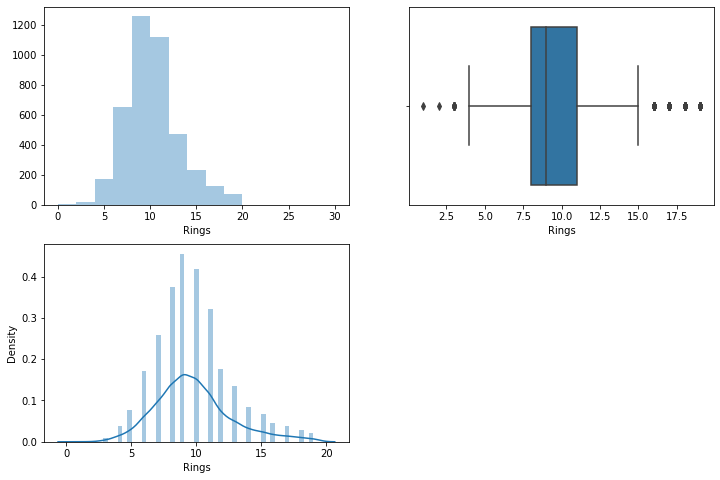

In [9]:
# Now we will try removing the outliers:

data = data[data['Rings'] < 20]
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(data['Rings']);
plt.subplot(2,2,3)
sns.distplot(data['Rings']);

## Observation:
### here we can see that the outliers have been reduced to an extent and also there is a change in the distribution peak and now the distribution looks "normal". 

# Size Attributes:

## Length:

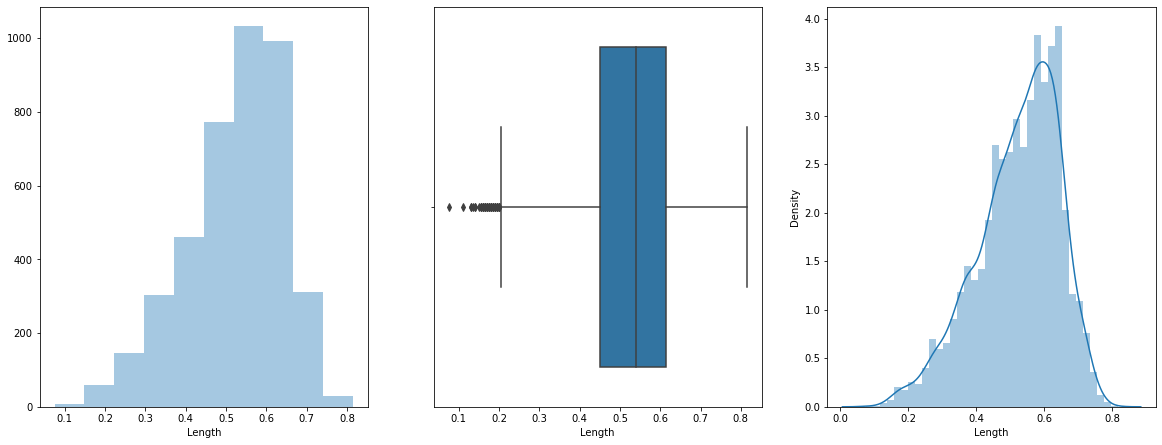

In [10]:
plt.figure(figsize=(20,25))
plt.subplot(3,3,1)
sns.distplot(data['Length'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(data['Length']);
plt.subplot(3,3,3)
sns.distplot(data['Length']);

## Observation:
###  Here we can see that the column "length" is approximately with normal distribution.

## Diameter:

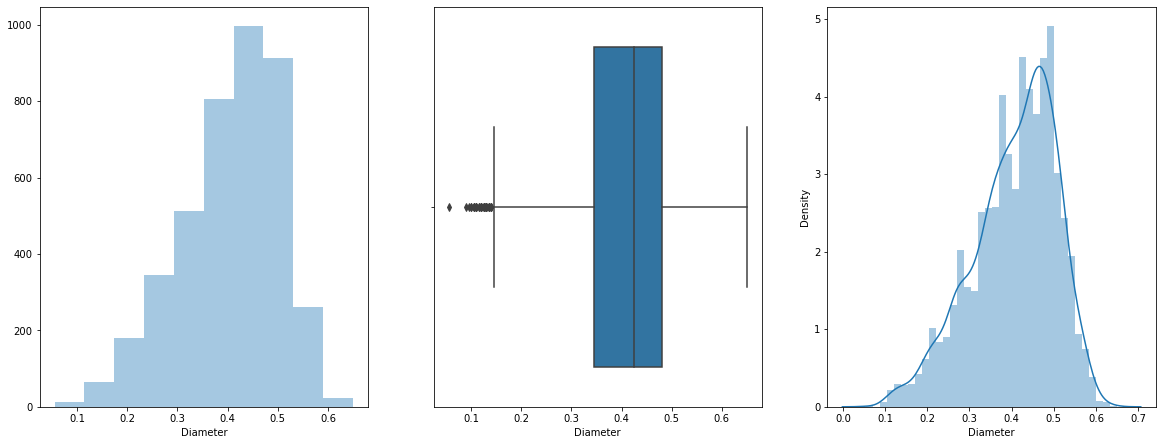

In [11]:
plt.figure(figsize=(20,25))
plt.subplot(3,3,1)
sns.distplot(data['Diameter'], kde=False, bins = 10);
plt.subplot(3,3,2)
sns.boxplot(data['Diameter']);
plt.subplot(3,3,3)
sns.distplot(data['Diameter']);

## Observation:
### Here we can see that the column "length" is approximately with normal distribution with outliers near by

## Height:

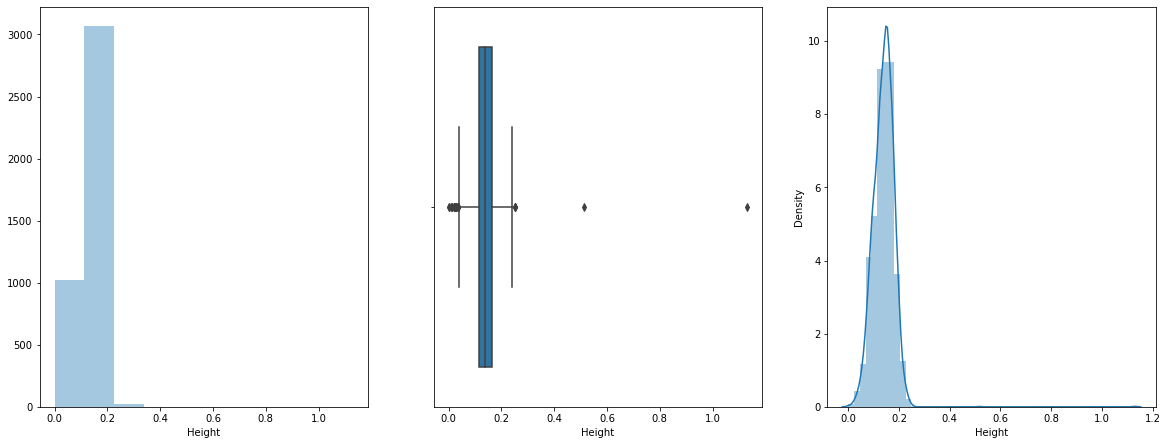

In [12]:
plt.figure(figsize=(20,25))
plt.subplot(3,3,1)
sns.distplot(data['Height'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(data['Height']);
plt.subplot(3,3,3)
sns.distplot(data['Height']);

## Observation: 
### Here we can see that there are outliers which lie far from the "central position" and also we can see that there is  high peak in the distribution which is due to the ouliers present in the distant variation in the boxplot.

### Here we try to normalize the column "Height" and  remove outliers.

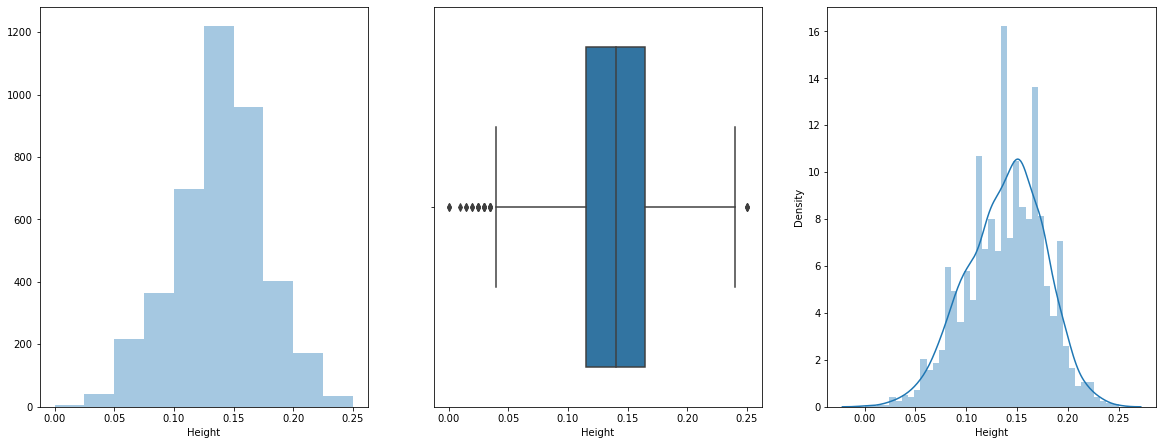

In [13]:
data = data[data['Height'] < 0.3]
plt.figure(figsize=(20,25))
plt.subplot(3,3,4)
sns.distplot(data['Height'], kde=False, bins= 10);
plt.subplot(3,3,5)
sns.boxplot(data['Height']);
plt.subplot(3,3,6)
sns.distplot(data['Height']);

## Observation:
###  Here we can see that the Outlier is removed and the Distribution Graph is normalized to an extent.

# Weight Attributes:

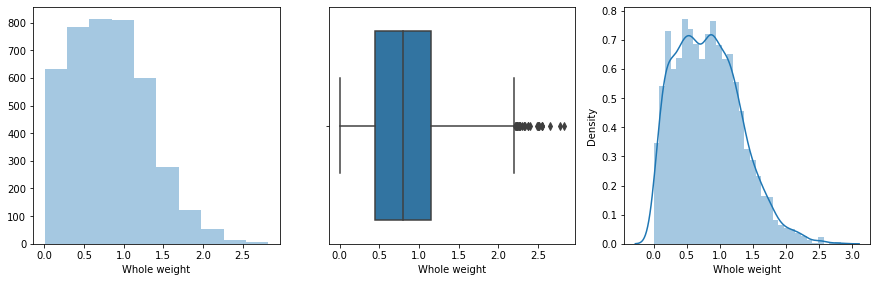

In [14]:
plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
sns.distplot(data['Whole weight'], kde=False, bins= 10);
plt.subplot(4,3,2)
sns.boxplot(data['Whole weight']);
plt.subplot(4,3,3)
sns.distplot(data['Whole weight']);

# Observation:
###  Here we can see that the column "Whole weight" graph has almost "normal distribution curve" and has 2 outliers present and so we are able to see the 2 peaks which are broadly divided.

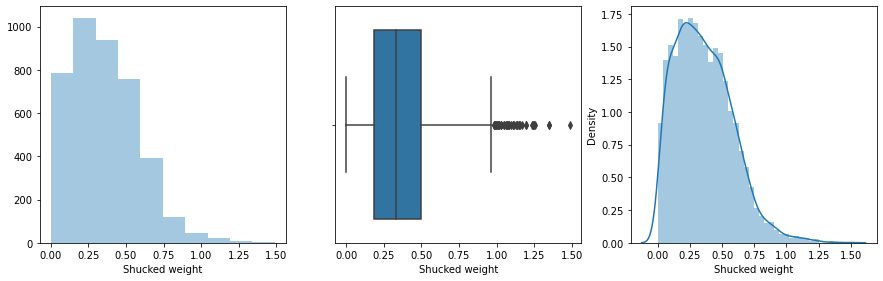

In [15]:
plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
sns.distplot(data['Shucked weight'], kde=False, bins= 10);
plt.subplot(4,3,2)
sns.boxplot(data['Shucked weight']);
plt.subplot(4,3,3)
sns.distplot(data['Shucked weight']);

## Observation:
###  Here we can see that the column "Shucked weight" graph has almost "Normal Distribution curve"

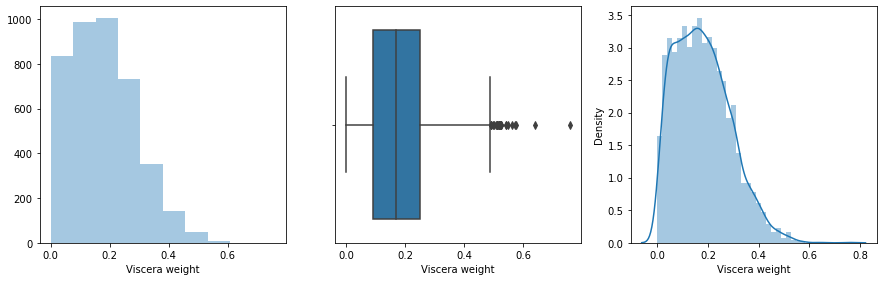

In [16]:
plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
sns.distplot(data['Viscera weight'], kde=False, bins= 10);
plt.subplot(4,3,2)
sns.boxplot(data['Viscera weight']);
plt.subplot(4,3,3)
sns.distplot(data['Viscera weight']);

## Observation:
### Here we can see the bell curve which is little larger and also we can see in boxplot that there are outliers which are at a distant from central line. 

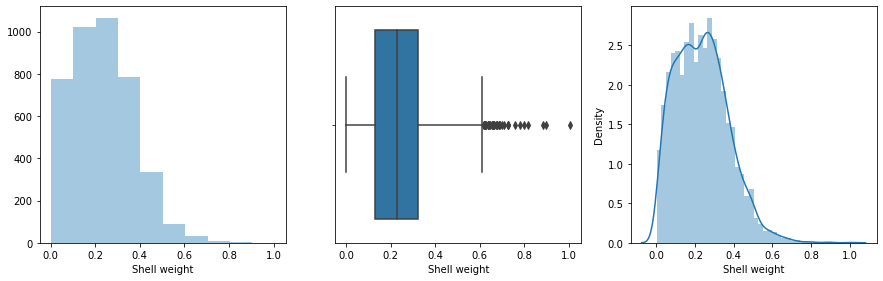

In [17]:
plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
sns.distplot(data['Shell weight'], kde=False, bins= 10);
plt.subplot(4,3,2)
sns.boxplot(data['Shell weight']);
plt.subplot(4,3,3)
sns.distplot(data['Shell weight']);

## Observation: 
### Here we can see that there are Outliers which are close to eachother and that can be negligible but there are 2 other outliers which are also at some distance from the Central Line,  So the Distribution Curve is little bit larger and thia is the reason why we can see that there are bell curve is with 2 peakswhich are divides broadly.

# Sex - Categorical value:

### The Column "Sex" is a Categorical Value included column and has the variables: Male, Female, Infant and here we analyse the count of the data through "bar plot".

<AxesSubplot:xlabel='Sex', ylabel='count'>

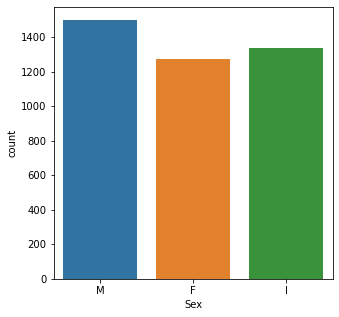

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(data.Sex)

## Observation:
###  Here we can see that all the Categories are balanced and thus we can say that our dataset is balanced.

# Visualization through Correlation:

## Multivariate Analysis:

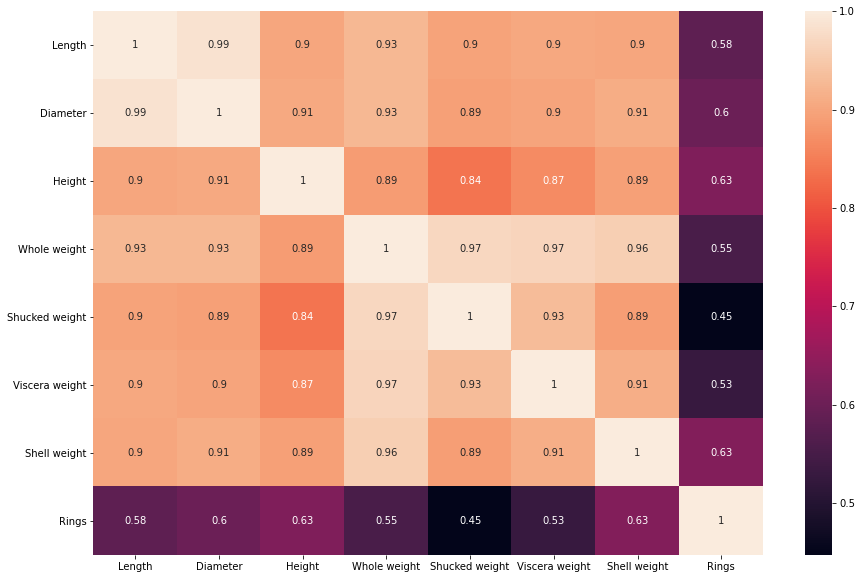

In [24]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True);

## Observation:
### Here we can see that the columns "Height" and "Shell weight" have the same same correlation values so we analyze both the variabes with the target variable "Rings" through multivariant analysis.

<Figure size 1080x720 with 0 Axes>

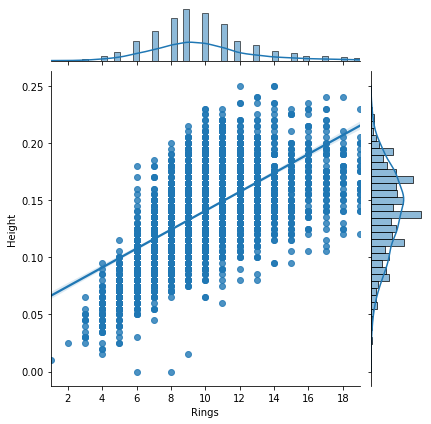

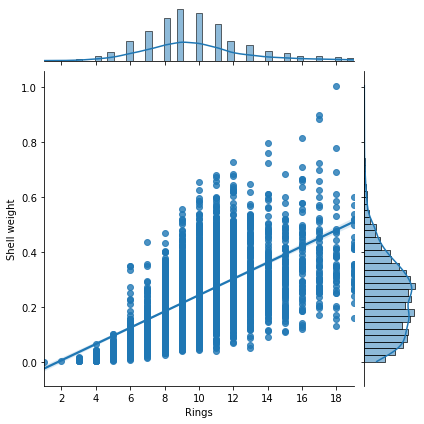

In [25]:
plt.figure(figsize=(15, 10))
sns.jointplot(data=data, x='Rings', y='Height', kind='reg');
sns.jointplot(data=data, x='Rings', y='Shell weight', kind='reg');

## Observation:
### Here we can see that if the number of  Rings are <11 then the correlation is good between the independent and  target variables and as the number of Rings are going on increasing the correlation between independent and target variables is decreasing.

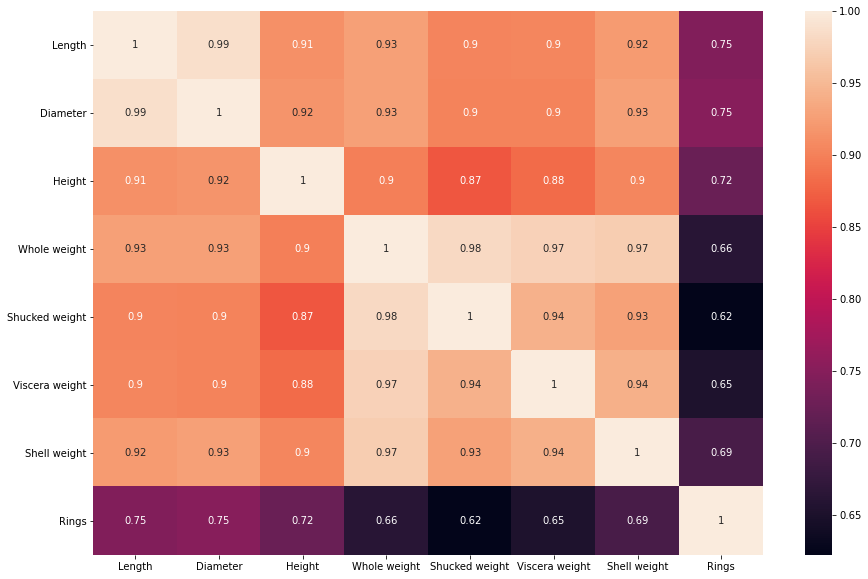

In [26]:
# Now we will see the correlation between the variables if the number of rings are <11.

abalone = data[data['Rings'] < 11]

plt.figure(figsize=(15, 10))
corr = abalone.corr()
sns.heatmap(corr, annot=True);

## Observation: 
###  Here we can see that the values of the columns "Height" and "Shell weight" have varied a little bit.

# Multivariant Analysis between the "Size attributes" and "Rings":

<Figure size 1440x360 with 0 Axes>

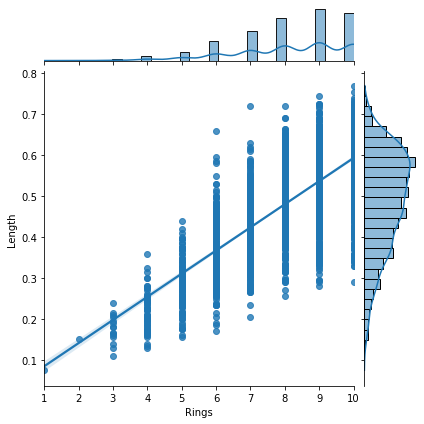

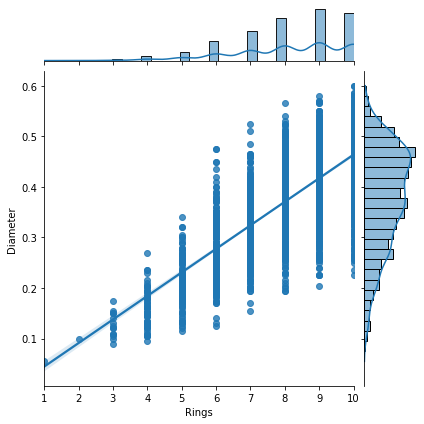

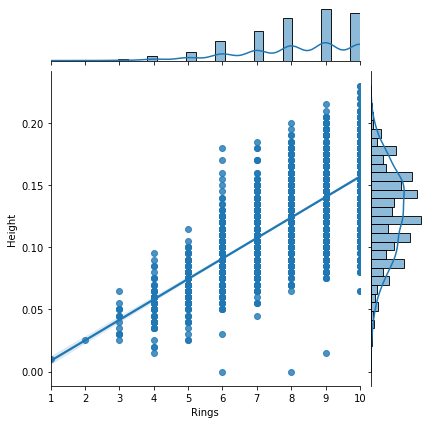

In [27]:
plt.figure(figsize=(20, 5))

sns.jointplot(data= abalone, x='Rings', y='Length', kind='reg')
sns.jointplot(data= abalone, x='Rings', y='Diameter', kind='reg')
sns.jointplot(data= abalone, x='Rings', y='Height', kind='reg')


## Observation:
### Here we can see that as the values of the columns "Height","Diameter","length" are increasing the number of Rings of abalone also are inceasing and so we can say that the columns: length, Diameter and height are directly proportional  to each other.

<Figure size 1440x360 with 0 Axes>

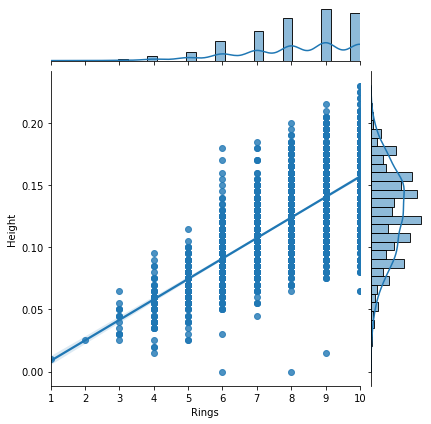

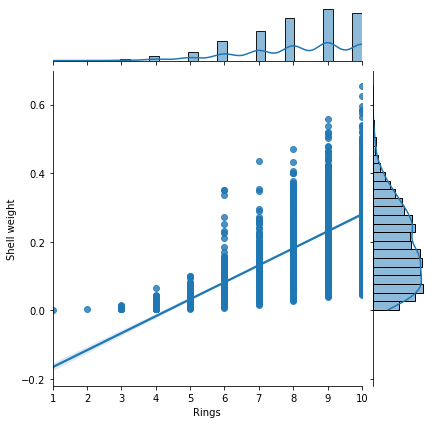

In [28]:
plt.figure(figsize=(20, 5))

sns.jointplot(data= abalone, x='Rings', y='Height', kind='reg')
sns.jointplot(data= abalone, x='Rings', y='Shell weight', kind='reg')

## Observation:
### Here also we can see that as the values of the columns: Height and "Shell weight" are increasing we can see that there is increase in the number of Rings.

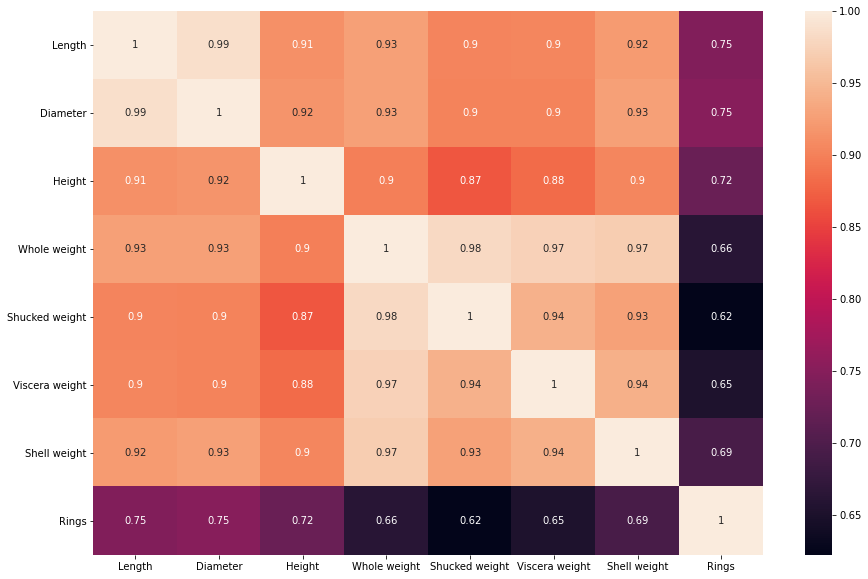

In [29]:
# Here we also observe if the number of Rings fare >11 then, How the correlation values change?

abalone_rings = data[data['Rings'] >= 11]

plt.figure(figsize=(15, 10))
corr = abalone.corr()
sns.heatmap(corr, annot=True);

## Observation: 
### Here we can see that as the number of rings increase by >11 then the correlation values are decreasing gradually and also reached near to Zero 

<Figure size 1440x720 with 0 Axes>

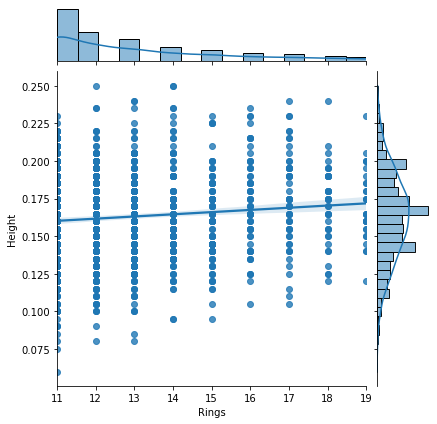

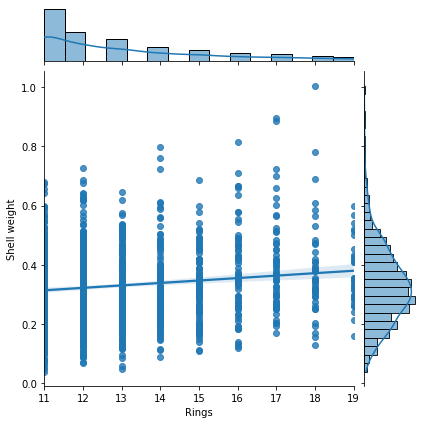

In [30]:
plt.figure(figsize=(20, 10))

sns.jointplot(data= abalone_rings , y='Height', x='Rings', kind='reg');
sns.jointplot(data= abalone_rings, y='Shell weight', x='Rings', kind='reg');


## Observation:
### Here we can see that if the number of rings are increasing ie., >11 then the correlation values decrease and sometimes stable, this may indicate that after certain age they stop increasing their size and weights.

### Here we see that if there is any influence of the categorical column "Sex" with attributes and Rings, through this we can say that how Sex influences the correlation between the other attributes and the target variables.

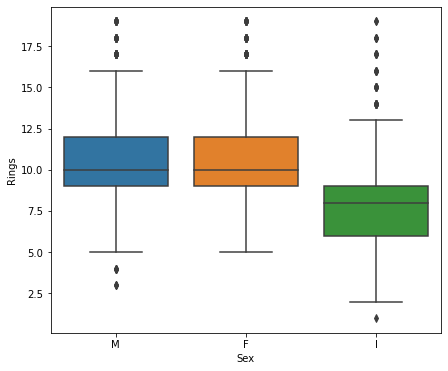

In [51]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=data, x='Sex', y='Rings');


## Observation: 
### Here we can see that the "Infant" boxplot has more outliers and the Central Line is towards the Upper Quartile and so the 25% and 50% quartiles are the main data and so the mean of this data is less compared to the other categories(M and F).

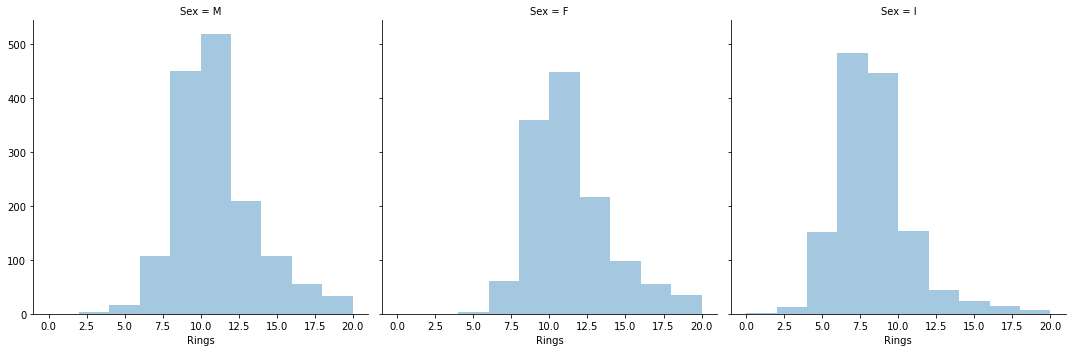

In [32]:
a = sns.FacetGrid(data, col='Sex', margin_titles=True, size=5)
a.map(sns.distplot, 'Rings', kde=False, bins=range(0, 21, 2))

## Observation: 
### Here we can see that the distribution is almost similar for all the categories but their concentration is different among them.

### Now we will have a look at the individual visualization of the graphs of the columns: "height" and "shell weight" with the "Sex".

# For height:

<AxesSubplot:xlabel='Sex', ylabel='Height'>

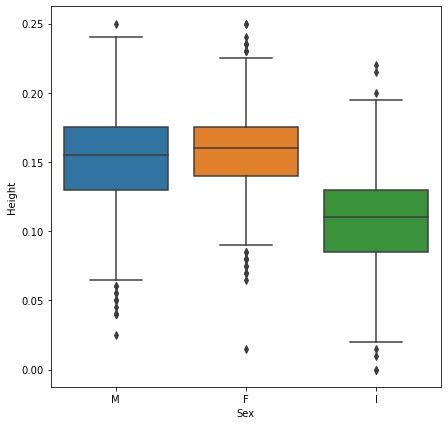

In [34]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=data, x='Sex', y='Height')

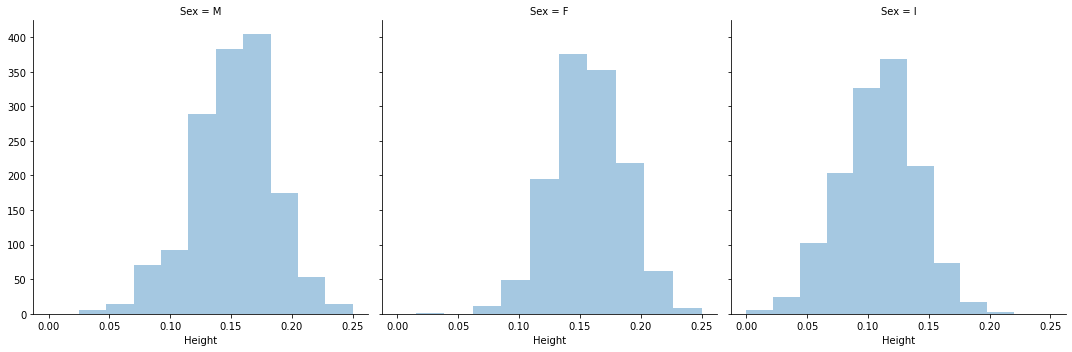

In [35]:
s = sns.FacetGrid(data, col='Sex', margin_titles=True, size=5)
s.map(sns.distplot, 'Height', kde=False, bins= 10)

## Observation:
### Here we can see that there is influence of "Sex" on the "Height" in different categories and we know that lower value of the rings give the high correlation value so the "infant" category is with good correlation.

<AxesSubplot:xlabel='Sex', ylabel='Shell weight'>

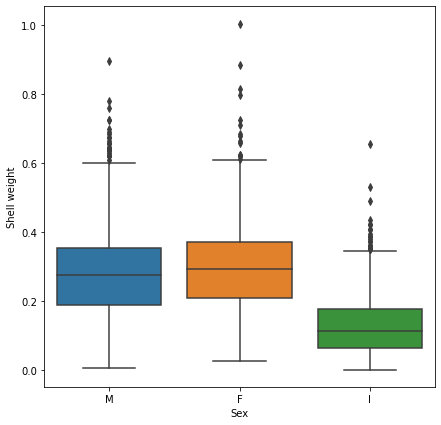

In [36]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=data, x='Sex', y='Shell weight')

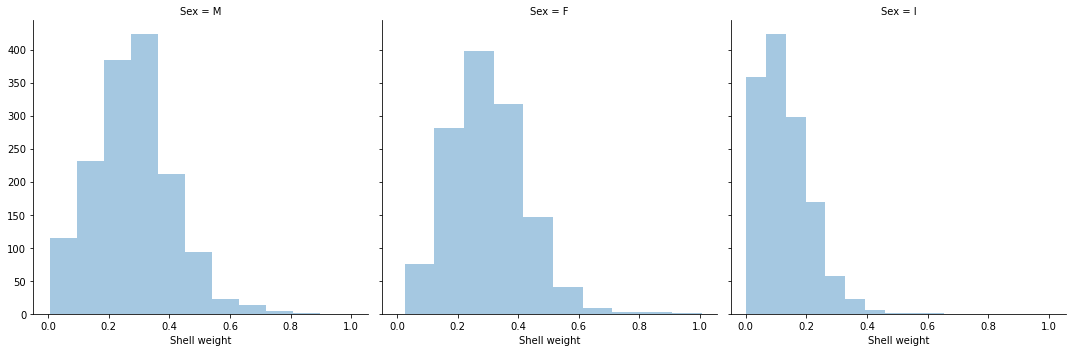

In [37]:
h = sns.FacetGrid(data, col='Sex', margin_titles=True, size=5)
h.map(sns.distplot, 'Shell weight', kde=False, bins= 10)

## Observation: 
### Here also we can see that there is influence of "Sex" on the "Shell weight" in different categories and we know  that the lower value of the rings give the high correlation value so the "infant" category is with good correlation.

<Figure size 1440x360 with 0 Axes>

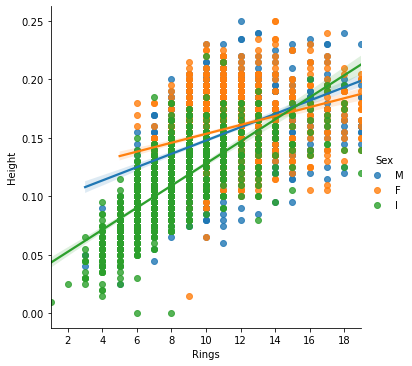

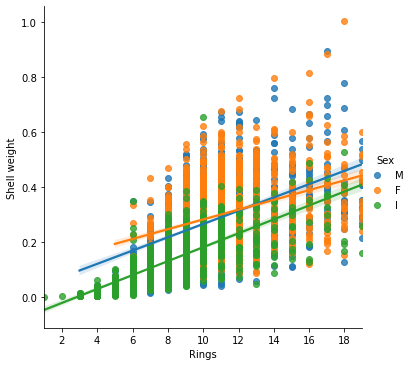

In [38]:
# Now here we will see that based on the categorical value "sex" , how "height" and "Rings" look and also how "Shell weight" and
# "Rings" look.

plt.figure(figsize=(20, 5))

sns.lmplot(data=data, x='Rings', y='Height', hue='Sex', fit_reg=True);
sns.lmplot(data=data, x='Rings', y='Shell weight', hue='Sex', fit_reg=True)

# Observation:
### 1) Here we can see that in both Height and Shell Weight, there is increase based on the Number of Rings to certain extent and is also with good correlation which is indicated above with Green Color.
### 2) Also we can see that the growth in female has not much variation.

In [40]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Here we can see that there is a column "Sex" which is categorical and so it is now converted to numerical for the proceeding with the model preparation with the help of label Encoder

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex']= le.fit_transform(data['Sex'])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Detection of Outliers:

## Z - Score method:

In [42]:
from scipy import stats
data_outlier= data.copy()
z = np.abs(stats.zscore(data_outlier))
print(z)

[[1.15333701 0.56301656 0.42029292 ... 0.7175453  0.62731976 1.80439163]
 [1.15333701 1.43643699 1.42790821 ... 1.19762037 1.21207157 0.95003668]
 [1.28745287 0.06085518 0.13389549 ... 0.34720167 0.18875591 0.2614296 ]
 ...
 [1.15333701 0.64313546 0.6880839  ... 0.98786425 0.52756506 0.2614296 ]
 [1.28745287 0.85109271 0.78884542 ... 0.74554064 0.43985228 0.08287394]
 [1.15333701 1.55814735 1.49417613 ... 1.80170581 1.8944224  0.77148101]]


### To have a better detection of the points where the outliers are seen, it is better to use "threshold method".

In [43]:
threshold = 3
print(np.where(z > 3))

(array([   8,   32,   79,  125,  126,  160,  161,  162,  162,  162,  163,
        165,  229,  229,  229,  229,  230,  230,  231,  231,  232,  249,
        268,  283,  300,  320,  342,  342,  348,  355,  407,  419,  457,
        471,  499,  553,  564,  612,  634,  642,  660,  662,  662,  685,
        685,  686,  853,  853,  853, 1010, 1013, 1013, 1014, 1014, 1136,
       1155, 1159, 1161, 1164, 1166, 1168, 1168, 1169, 1169, 1169, 1169,
       1171, 1171, 1219, 1379, 1383, 1387, 1388, 1388, 1388, 1389, 1390,
       1390, 1489, 1715, 1717, 1718, 1720, 1722, 1723, 1723, 1723, 1724,
       1724, 1724, 1782, 1943, 1947, 1948, 2050, 2061, 2073, 2073, 2116,
       2119, 2120, 2128, 2157, 2163, 2228, 2230, 2300, 2314, 2316, 2329,
       2444, 2489, 2568, 2569, 2569, 2569, 2570, 2654, 2655, 2655, 2755,
       2755, 2756, 2756, 2756, 2807, 2808, 2808, 2808, 2952, 2953, 3092,
       3130, 3185, 3259, 3299, 3312, 3320, 3331, 3366, 3366, 3366, 3538,
       3538, 3567, 3652, 3654, 3654, 3654, 3654, 3

## Observation:
### This is the data where the outliers are >3.

# Removal of the Outliers:

### This can be done as the outliers are identified with the Z- Score method and threshold is taken of them

In [45]:
data.shape

(4113, 9)

In [46]:
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [47]:
data_outlier= data_outlier[(z < 3).all(axis=1)]

data_outlier.shape

(3992, 9)

## Observation: 
### 4113 - 3992 = 121
### 1) That means almost around 121 rows are removed ie., the outliers are removed.

In [48]:
loss_percent = (4113-3992)/4113*100
print(loss_percent)

2.9418915633357647


In [49]:
# Now here we will separate the dependent and independent variables:

features = data_outlier.drop('Rings', axis = 1)
target = data_outlier. Rings 


### Scaling the data using Min-Max Scaler:

In [50]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.metrics import accuracy_score
for i in range(0,100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,random_state = i, test_size = 0.2)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print("At random state",i,"The model performs very well")
    print("random state:-", i)
    print(f"At random state {i}, the training accuracy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")


At random state 0 The model performs very well
random state:- 0
At random state 0, the training accuracy is:-0.518951480514051
At random state 0, the testing accuracy is:- 0.5044256099225525


At random state 1 The model performs very well
random state:- 1
At random state 1, the training accuracy is:-0.521149183089862
At random state 1, the testing accuracy is:- 0.4915551709170307


At random state 2 The model performs very well
random state:- 2
At random state 2, the training accuracy is:-0.5183997650327887
At random state 2, the testing accuracy is:- 0.5010140464759558


At random state 3 The model performs very well
random state:- 3
At random state 3, the training accuracy is:-0.5215065815803863
At random state 3, the testing accuracy is:- 0.49408435867725486


At random state 4 The model performs very well
random state:- 4
At random state 4, the training accuracy is:-0.5127382238590824
At random state 4, the testing accuracy is:- 0.528552266805464


At random state 5 The model perf

###  We have already imported Train_test_split
### Now we are going to split the data

In [52]:
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.2, random_state = 34)

# Training the model:

In [53]:
lr.fit(features_train,target_train)

LinearRegression()

In [54]:
pred_test = lr.predict(features_test)

In [55]:
print(r2_score(target_test,pred_test))

0.566382472050075


# Cross Validation of the model:

In [56]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)

for j in range(2,10):
    cv_score = cross_val_score(lr,features,target,cv = j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and the accuracy score for training is {Train_accuracy} and the accuracy for the testing is {Test_accuracy}")
    print("\n")


At cross fold 2 the cv score is 0.5124552384226342 and the accuracy score for training is -0.5730122702256346 and the accuracy for the testing is 0.566382472050075


At cross fold 3 the cv score is 0.5024115928148113 and the accuracy score for training is -0.5730122702256346 and the accuracy for the testing is 0.566382472050075


At cross fold 4 the cv score is 0.4317563090696439 and the accuracy score for training is -0.5730122702256346 and the accuracy for the testing is 0.566382472050075


At cross fold 5 the cv score is 0.42457959183466515 and the accuracy score for training is -0.5730122702256346 and the accuracy for the testing is 0.566382472050075


At cross fold 6 the cv score is 0.439040380534414 and the accuracy score for training is -0.5730122702256346 and the accuracy for the testing is 0.566382472050075


At cross fold 7 the cv score is 0.4435356275168672 and the accuracy score for training is -0.5730122702256346 and the accuracy for the testing is 0.566382472050075


At c

### Here we can select cv_score = 5

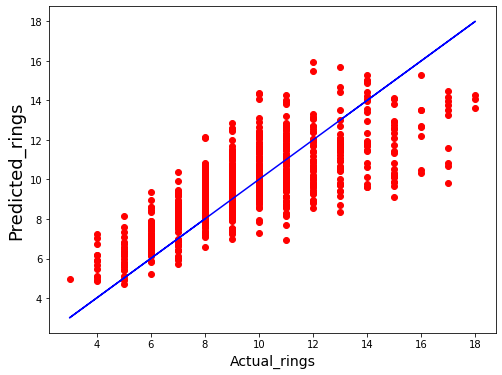

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.scatter(x = target_test,y = pred_test, color = 'r')
plt.plot(target_test,target_test,color = 'b')
plt.xlabel('Actual_rings',fontsize = 14)
plt.ylabel('Predicted_rings',fontsize = 18)
plt.show()

# Regularization:

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [59]:
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state' :list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [60]:
# Final model training:

ls = Lasso(alpha = 0.0001, random_state = 0)
ls.fit(features_train,target_train)
ls_score_training = ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100

50.42711332494974

In [61]:
lss = r2_score(target_test,pred_ls)
lss*100

56.646944837263355

In [62]:
cv_score = cross_val_score(ls,features,target,cv = 5)
cv_mean = cv_score.mean()
cv_mean

0.42448557954781563

## Observation:
### Here we can see a lot of difference between cv-mean and lss is more and so our model is not good

# Ensemble technique:

In [64]:
parameters = {'criterion': ['mse','mae'], 'max_features': ['auto', 'sqrt', 'log2']}

forest = RandomForestRegressor()
Regressor = GridSearchCV(forest,parameters)
Regressor.fit(features_train,target_train)

print(Regressor.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [65]:
forest = RandomForestRegressor(criterion = 'mse', max_features = 'sqrt')
forest.fit(features_train,target_train)
forest.score(features_train,target_train)

pred_decision = forest.predict(features_test)
forestS = r2_score(target_test,pred_decision)
print('R2 Score:', forestS*100)

forestScore = cross_val_score(forest,features,target,cv = 5)
forestC = forestScore.mean()
print("Cross Val Score:",forestC*100)

R2 Score: 56.69368954193206
Cross Val Score: 47.44286455172994


## Observation:
### Here we can see that there is increase in the R2 and cv score in Random Forest  when compared to Linear Regression model.

In [67]:
# saving the model:

import pickle
filename = 'alone.pkl'
pickle.dump(forest,open(filename, 'wb'))

# Conclusion:

In [68]:
loaded_model = pickle.load(open("alone.pkl", "rb"))
result = loaded_model.score(features_test, target_test)
print(result)

0.5669368954193206


In [69]:
conclusion = pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index = ["Predicted","Original"])

In [70]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,789,790,791,792,793,794,795,796,797,798
Predicted,12.07,14.64,10.32,10.31,11.82,9.25,13.57,9.5,11.06,10.64,...,8.07,6.97,10.39,10.6,9.23,9.08,6.55,13.67,4.68,9.97
Original,12.07,14.64,10.32,10.31,11.82,9.25,13.57,9.5,11.06,10.64,...,8.07,6.97,10.39,10.6,9.23,9.08,6.55,13.67,4.68,9.97
